# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [4]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [5]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\huynh\AppData\Local\Temp\ipykernel_6272\3482823818.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i].loc[df[i]==j] = num
C:\Users\huynh\AppData\Local\Temp\ipykernel_6272\3482823818.py:7: SettingWithCopyWarning: 
A value is t

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [6]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [7]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

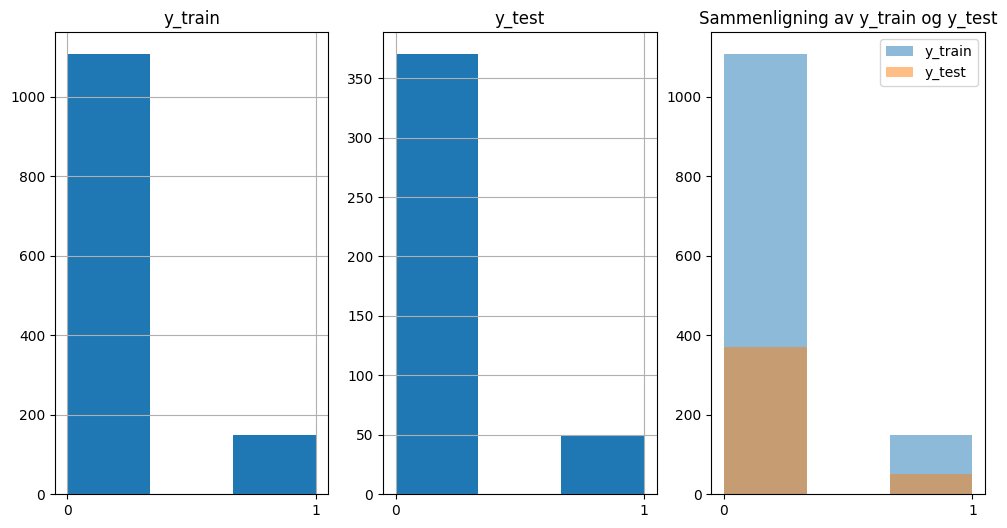

In [8]:
#TODO: visualiser y_train og y_test i et histogram
import matplotlib.pyplot as plt

BINS = 3
KLASSIFISERINGER = [0,1]
# visualiser y_train og y_test i et histogrammer
plt.figure(figsize=(12, 6))
## y_train
plt.subplot(1, 3, 1)
y_train.hist(bins=BINS)
plt.title('y_train')
plt.xticks(KLASSIFISERINGER)
## y_test
plt.subplot(1, 3, 2)
y_test.hist(bins=BINS)
plt.title('y_test')
plt.xticks(KLASSIFISERINGER)
## sammenligning
plt.subplot(1,3,3)
plt.hist(y_train, bins=BINS, alpha=0.5, label='y_train')
plt.hist(y_test, bins=BINS, alpha=0.5, label='y_test')
plt.legend(loc='upper right')
plt.title("Sammenligning av y_train og y_test")
plt.xticks(KLASSIFISERINGER)
# Vis plottet

plt.show()

**Svar:**
Klassifiseringsproblemer har vanligvis diskrete utfall, hvor dataene ofte kan grupperes i kategorier (for eksempel: epler og appelsiner). I et histogram for et klassifiseringsproblem vil du se separate stolper for hver kategori.

Regresjonsproblemer involverer kontinuerlige utfall, og et histogram relevant for regresjon vil dermed vise én kontinuerlig fordeling av verdier (for eksempel: prisene på hus).

For diskrete og kategoriske data vil histogrammet som regel ha separate, distinkte stolper. For kontinuerlige data vil histogrammet vise en jevn kurve eller mange stenger som flyter inn i hverandre uten tydelige skiller mellom dem.
> I dette tilfelle er det en klar Binær klassifiseringsproblem. 0/1 klassifisering.

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

# Funksjon for hyperparameter søk
def hyperparameter_search(X, y, model):
    """Hyperparameter søk for en gitt modell\n
    Args:
        X (DataFrame): Egenskaper
        y (Series): Target
        model (sklearn model): Modell som skal søkes på
    Returns:
        dict: Beste hyperparametere
        float: Beste score
        """
    if isinstance(model, RandomForestClassifier):
        param_grid = {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
    elif isinstance(model, LogisticRegression):
        param_grid = {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X, y)
    return grid_search.best_params_, grid_search.best_score_

# Eksempel på bruk av funksjonen:
# anta at `X` er egenskaper DataFramen og `y` er target Series
# best_params, best_score = hyperparameter_search(X, y)

In [40]:

from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedKFold, cross_val_score


# Hent beste parametere og beste score for modellene
best_params_model1, best_score_model1 = hyperparameter_search(X_train, y_train, RandomForestClassifier(random_state=42))
best_params_model2, best_score_model2 = hyperparameter_search(X_train, y_train, LogisticRegression(random_state=42, max_iter=1000))


# Definerer modellene med beste parametere
model1 = RandomForestClassifier(random_state=42, **best_params_model1)
model2 = LogisticRegression(random_state=42, max_iter=1000, **best_params_model2)


# Definerer kryssvalideringsmetoden
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Definerer scorerne
f1_scorer = make_scorer(f1_score, average='weighted')
accuracy_scorer = make_scorer(accuracy_score)

# Utfører repeterte kryssvalideringer og skårer ytelsen
f1_scores_model1 = cross_val_score(model1, X, y, cv=rkf, scoring=f1_scorer)
f1_scores_model2 = cross_val_score(model2, X, y, cv=rkf, scoring=f1_scorer)
accuracy_scores_model1 = cross_val_score(model1, X, y, cv=rkf, scoring=accuracy_scorer)
accuracy_scores_model2 = cross_val_score(model2, X, y, cv=rkf, scoring=accuracy_scorer)


In [42]:
# printer f1-score og accuracy for modellene
accuracy_print =(
    "RandomForestClassifier:\n"
    +f"\tGjennomsnittelig F1-score: {f1_scores_model1.mean():.3f}\n"
    +f"\tGjennomsnittelig accuracy: {accuracy_scores_model1.mean():.3f}\n"+
    "LogisticRegression:\n"
    +f"\tGjennomsnittelig F1-score: {f1_scores_model2.mean():.3f}\n"
    +f"\tGjennomsnittelig accuracy: {accuracy_scores_model2.mean():.3f}\n"
    )
print(accuracy_print)

RandomForestClassifier:
	Gjennomsnittelig F1-score: 0.843
	Gjennomsnittelig accuracy: 0.885
LogisticRegression:
	Gjennomsnittelig F1-score: 0.853
	Gjennomsnittelig accuracy: 0.884



In [43]:
import numpy as np
# Skriver ut gjennomsnittlig F1-score og nøyaktighet for hver modell
def get_eval(t_stat, p_value):
    """Evaluerer resultatene av en to-sidig T-test\n
    Args:
        t_stat (float): T-statistikk
        p_value (float): P-verdi
    Returns:
        str: Resultatet av evalueringen
    """

    models = (
    ['RandomForestClassifier', 'LogisticRegression'] 
    if np.mean(f1_scores_model1) > np.mean(f1_scores_model2) 
    else 
    ['LogisticRegression', 'RandomForestClassifier']
            )

    # Skriver ut T-statistikk og P-verdi
    eval_print=(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}\n")

    # Tolker resultatene
    if p_value >= 0.05: # Hvis p-verdien er mindre enn 0.05, er forskjellen signifikant
        eval_print += ("Det er ingen signifikant forskjell mellom modellene.\n")
        return eval_print
    
    # Hvis det er en signifikant forskjell, sammenlign modellene
    eval_print += ("Det er en signifikant forskjell mellom modellene.\n")
    eval_print += (f"Modellen {models[0]} er bedre enn {models[1]}.\n")
   
    return eval_print



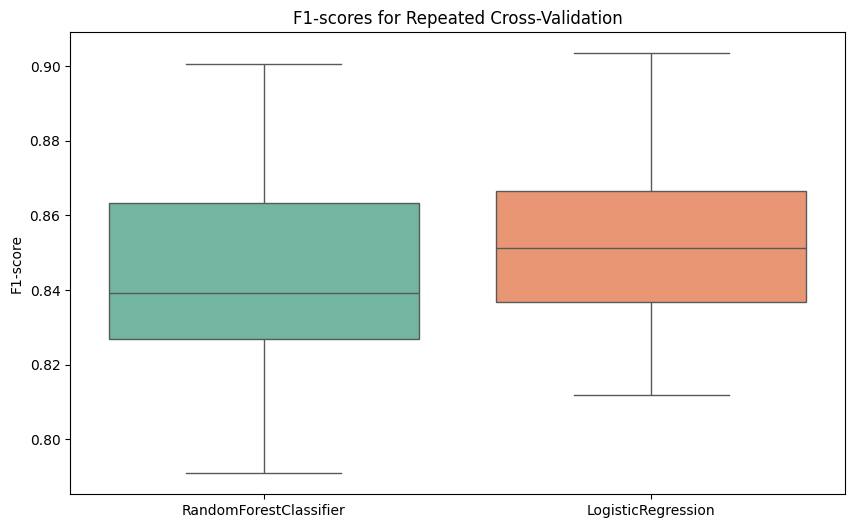

T-statistic: -2.0263, P-value: 0.0455
Det er en signifikant forskjell mellom modellene.
Modellen LogisticRegression er bedre enn RandomForestClassifier.



In [44]:

from scipy.stats import ttest_ind
import seaborn as sns



# Visualiserer F1-skårene som et boksplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[f1_scores_model1, f1_scores_model2], palette="Set2")
plt.xticks([0, 1], ['RandomForestClassifier', 'LogisticRegression'])
plt.title('F1-scores for Repeated Cross-Validation')
plt.ylabel('F1-score')
plt.show()

# Utfører en to-sidig T-test for å sammenligne modellene
t_stat, p_value = ttest_ind(f1_scores_model1, f1_scores_model2)
# Skriver ut resultatet av T-testen
print(get_eval(t_stat, p_value))
        


**Svar:**
Terskelen for signifikant endring er satt P-verdi < 0.05  <br>
T-statistic: -2.0263, P-value: 0.0455, så vidt under 0.05<br>
Det er en signifikant forskjell mellom modellene.<br>
Modellen LogisticRegression er bedre enn RandomForestClassifier.

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

In [45]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


In [46]:
# Utfører repeterte kryssvalideringer med SMOTE-oppsampling
def cross_val_with_smote(model, X, y, cv, scoring):
    """Utfører repeterte kryssvalideringer med SMOTE-oppsampling\n
    Args:
        model (sklearn model): Modell
        X (DataFrame): Egenskaper
        y (Series): Target
        cv (int): Antall k-folds
        scoring (str): Scorer
    Returns:
        array: Resultater
    """
    # Definerer SMOTE, Synthetic Minority Over-sampling Technique (SMOTE)
    smote = SMOTE(random_state=42) 
    # Definerer pipeline, tar inn SMOTE-oppsampling og modell type som sekvenser og utfører dem i rekkefølge
    pipeline = Pipeline([('smote', smote), ('model', model)])
    # Utfører kryssvalidering, med sekvensiell utforming med smote og modell
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=scoring)
    return scores

In [47]:
# Hent beste parametere og beste score for modellene
best_params_model1, best_score_model1 = hyperparameter_search(X_train, y_train, RandomForestClassifier(random_state=42))
best_params_model2, best_score_model2 = hyperparameter_search(X_train, y_train, LogisticRegression(random_state=42, max_iter=1000))

# Definerer modellene med beste parametere
model1 = RandomForestClassifier(random_state=42, **best_params_model1)
model2 = LogisticRegression(random_state=42, max_iter=1000, **best_params_model2)

# Definerer kryssvalideringsmetoden
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Definerer scorerne
f1_scorer = make_scorer(f1_score, average='weighted')
accuracy_scorer = make_scorer(accuracy_score)

# Utfører repeterte kryssvalideringer med SMOTE-oppsampling
f1_scores_model1 = cross_val_with_smote(model1, X, y, rkf, f1_scorer)
f1_scores_model2 = cross_val_with_smote(model2, X, y, rkf, f1_scorer)
accuracy_scores_model1 = cross_val_with_smote(model1, X, y, rkf, accuracy_scorer)
accuracy_scores_model2 = cross_val_with_smote(model2, X, y, rkf, accuracy_scorer)



In [38]:
# printer f1-score og accuracy for modellene
accuracy_print =(
    "RandomForestClassifier:\n"
    +f"\tGjennomsnittelig F1-score: {f1_scores_model1.mean():.3f}\n"
    +f"\tGjennomsnittelig accuracy: {accuracy_scores_model1.mean():.3f}\n"+
    "LogisticRegression:\n"
    +f"\tGjennomsnittelig F1-score: {f1_scores_model2.mean():.3f}\n"
    +f"\tGjennomsnittelig accuracy: {accuracy_scores_model2.mean():.3f}\n"
    )
print(accuracy_print)

RandomForestClassifier:
	Gjennomsnittelig F1-score: 0.870
	Gjennomsnittelig accuracy: 0.878
LogisticRegression:
	Gjennomsnittelig F1-score: 0.852
	Gjennomsnittelig accuracy: 0.843



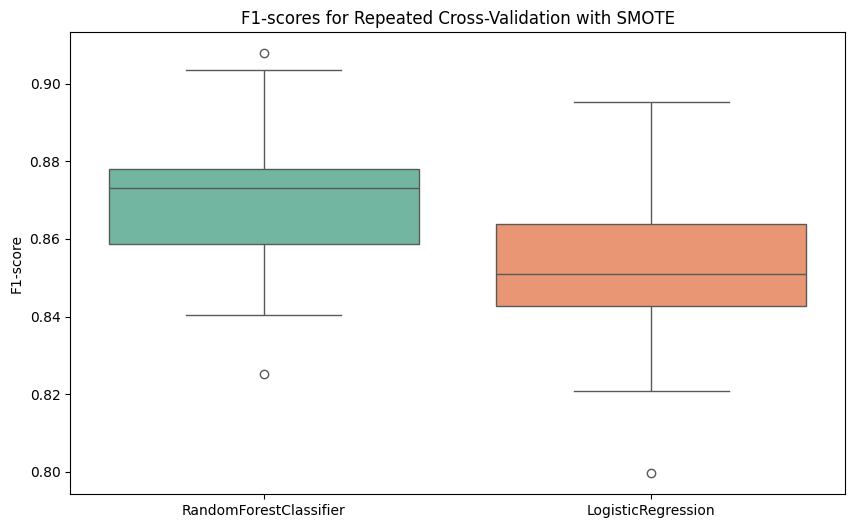

T-statistic: 5.4156, P-value: 0.0000
Det er en signifikant forskjell mellom modellene.
Modellen RandomForestClassifier er bedre enn LogisticRegression.



In [37]:
# Visualiserer F1-skårene som et boksplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=[f1_scores_model1, f1_scores_model2], palette="Set2")
plt.xticks([0, 1], ['RandomForestClassifier', 'LogisticRegression'])
plt.title('F1-scores for Repeated Cross-Validation with SMOTE')
plt.ylabel('F1-score')
plt.show()

# Utfører en to-sidig T-test
t_stat, p_value = ttest_ind(f1_scores_model1, f1_scores_model2)
print(get_eval(t_stat, p_value))

**Svar:**


__Resultater for 2.3:__<br>
T-statistic: 5.4156, P-value: 0.0000 <br>
Det er en signifikant forskjell mellom modellene.<br>
Modellen RandomForestClassifier er bedre enn LogisticRegression.<br>

__Resultater for 2.3:__
T-statistic: -2.0263, P-value: 0.0455<br>
Det er en signifikant forskjell mellom modellene.<br>
Modellen LogisticRegression er bedre enn RandomForestClassifier.

__Sammenligning__
|oppgave:| T-statistic | P-value | Signifikant forskjell | Beste modell             |
|--------|-------------|---------|-----------------------|--------------            |
| 2.2    | -2.0263     | 0.0455  | Ja                    | LogisticRegression       |
| 2.3    | 5.4156      | 0.0000  | Ja                    | RandomForestClassifier   |

- Terskelen for å ha en signifikant endring er satt til P-Verdi < 0.05
  - Dette gjør tilsier at i oppgave 2.2 så har P-verdien kommet veldig nær grensen på en signifikant endring. Derfor vil den endringen ikke være like drastisk som i 2.3
- Største forskjellen på 2.3 og 2.2 er at den beste modellen har endret seg, RandomForestClassifier har fått mest ut av SMOTE-oppskalering, hvor den var verst med så vidt en "signifikant" forskjell. 

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [59]:

from sklearn.metrics import confusion_matrix, precision_score, recall_score

def get_metrics(y_test, y_pred):
    # Beregn metrikker
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Beregn sensitivitet og spesifisitet
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, _, _ = cm.ravel()
    sensitivity = recall  # Sensitivitet er det samme som recall
    specificity = tn / (tn + fp)

    return accuracy, precision, recall, sensitivity, specificity, f1

In [60]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene


best_model = RandomForestClassifier(random_state=42, **best_params_model1)
best_model.fit(X_train, y_train)

# Utfør prediksjon på testsettet
y_pred = best_model.predict(X_test)

# Hent metrikker
accuracy, precision, recall, sensitivity, specificity, f1 = get_metrics(y_test, y_pred)

# Skriv ut resultatene
print(f"Accuracy: {accuracy:.4f}")
print(f"Presisjon: {precision:.4f}")
print(f"Sensitivitet (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-skår: {f1:.4f}")


Accuracy: 0.8810
Presisjon: 0.8405
Sensitivitet (Recall): 0.8810
Specificity: 0.9919
F1-skår: 0.8375


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [ ]:
def get_gendered_metrics(y_test, y_pred, isMale:bool = True):
        # Hent metrikker
    accuracy, precision, recall, sensitivity, specificity, f1 = get_metrics(y_test_women, y_pred_women)

    # Skriv ut resultatene
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tPresisjon: {precision:.4f}")
    print(f"\tSensitivitet (Recall): {sensitivity:.4f}")
    print(f"\tSpecificity: {specificity:.4f}")
    print(f"\tF1-skår: {f1:.4f}")

In [ ]:
#TODO: Gjør kjønnsbasert analyse på testdataene

# Finn integer verdiene for 'Male' og 'Female'
male_value = df['Gender'].loc[df['Gender'] == 1].iloc[0]
female_value = df['Gender'].loc[df['Gender'] == 0].iloc[0]

# Del opp testsettet basert på kjønn
X_test_men = X_test[X_test['Gender'] == male_value]
y_test_men = y_test[X_test['Gender'] == male_value]
X_test_women = X_test[X_test['Gender'] == female_value]
y_test_women = y_test[X_test['Gender'] == female_value]

# Tren den beste modellen på nytt
best_model = RandomForestClassifier(random_state=42, **best_params_model1)
best_model.fit(X_train, y_train)

# Utfør prediksjon på testsettet for menn
y_pred_men = best_model.predict(X_test_men)

# Utfør prediksjon på testsettet for kvinner
y_pred_women = best_model.predict(X_test_women)





Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [12]:
#!pip freeze > requirements.txt